<a href="https://colab.research.google.com/github/jeandata/projetos/blob/main/ML(classifica%C3%A7%C3%A3o).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse projeto visa determinar se Maria tem potencial de permanecer na empresa ou de sair da empresa.

# <font color = 73c2be> **Importação dos dados e Tratamento**

In [ ]:
import pandas as pd

In [ ]:
uri = "https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv"
dados = pd.read_csv(uri)

In [ ]:
dados.shape

(7043, 18)

In [ ]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


## Tratamento dos dados

In [ ]:
a_trocar = {
    'Sim' : 1,
    'Nao' : 0
}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(a_trocar)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [ ]:
#transformação pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                                         axis=1))

#junção dos dados transfomrandos com os que já tinhamos
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

In [ ]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False


In [ ]:
dados_final.shape

(7043, 39)

In [ ]:
#Ajustar para que todas as colunas apareçam

pd.set_option('display.max_columns',39)

In [ ]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False


In [ ]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]
Xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

#<font color = 73c2be> **Balanceamento dos dados**

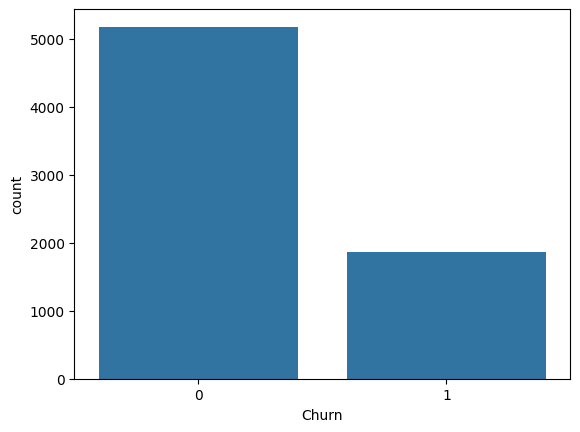

In [ ]:
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=dados_final)

In [ ]:
dados_final.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)
dados_final = pd.concat([X, y], axis=1)
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,0
1,0,0,1,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,0


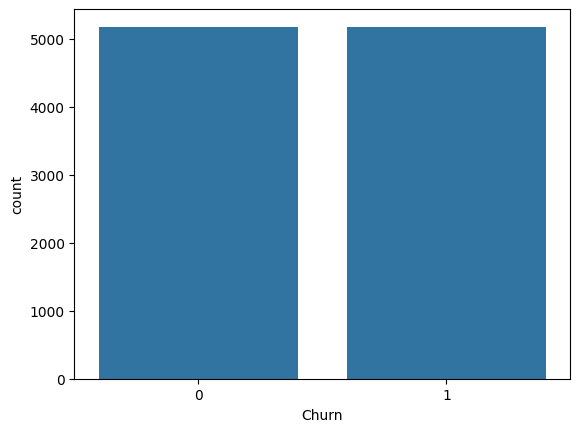

In [ ]:
ax = sns.countplot(x='Churn', data=dados_final)

In [ ]:
dados_final.Churn.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [ ]:
#Divisão em inputs e outputs
X = dados_final.drop('Churn', axis = 1)
Y = dados_final['Churn']

In [ ]:
#Padronizar os dados
from sklearn.preprocessing import StandardScaler

In [ ]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52771004, -3.06083934, ...,  1.05423234,
        -0.54757347, -0.5315994 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.9485575 ,
         1.82623896, -0.5315994 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.9485575 ,
         1.82623896, -0.5315994 ],
       ...,
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.05423234,
        -0.54757347, -0.5315994 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.9485575 ,
        -0.54757347, -0.5315994 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.9485575 ,
        -0.54757347, -0.5315994 ]])

In [ ]:
X_normalizado[0]

array([ 1.26542767, -0.52771004, -3.06083934,  0.81482091, -0.41318358,
       -1.10771815, -1.3217706 , -0.99594945,  3.06083934, -0.93594717,
        1.48315631, -1.05853285, -0.44850949,  0.77803383, -0.44850949,
       -0.59639952, -1.09729069, -0.44850949,  1.35121363,  0.91935908,
       -0.44850949, -0.73960631,  0.7857356 , -0.44850949, -0.60652979,
        1.08898545, -0.44850949, -0.84638695,  1.10588699, -0.44850949,
       -0.85787548, -0.4605816 ,  0.68807296, -0.47286547, -0.50790015,
        1.05423234, -0.54757347, -0.5315994 ])

In [ ]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52771004,  0.32670777,  0.81482091, -0.41318358,
        -1.14938255, -0.97236043,  1.00406703, -0.32670777, -0.93594717,
        -0.67423777,  0.94470379, -0.44850949,  0.77803383, -0.44850949,
        -0.59639952, -1.09729069, -0.44850949,  1.35121363,  0.91935908,
         2.22960721, -0.73960631, -1.27269275,  2.22960721, -0.60652979,
         1.08898545, -0.44850949, -0.84638695, -0.90425153, -0.44850949,
         1.16567033, -0.4605816 , -1.45333425,  2.1147664 , -0.50790015,
        -0.9485575 , -0.54757347,  1.88111576]])

In [ ]:
import numpy as np

In [ ]:
a = Xmaria_normalizado
b = X_normalizado[0]
a-b
np.square(a-b)
soma = np.sum(np.square(a-b))
np.sqrt(soma)

9.37010717250055

#<font color = 73c2be> **Separação para Treino e Teste**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_normalizado, Y, test_size = 0.3, random_state=123)

#<font color = 73c2be> **Modelos**

###<font color = pink> KNN

In [ ]:
#Biblioteca do KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Instanciar o modelo
knn = KNeighborsClassifier(metric = 'euclidean')

In [ ]:
#Treinar o Modelo com dados do treino
knn.fit(X_treino, Y_treino)

KNeighborsClassifier(metric='euclidean')

In [ ]:
#Testar o modelo com dados de teste
predito_knn = knn.predict(X_teste)

In [ ]:
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

###<font color = pink> Naive Bayes

In [ ]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

In [ ]:
#escolho utilizar mediana, porque é o valor central dos nossos dados ordenados
np.median(X_treino)

-0.44850949388572553

In [ ]:
#criamos o modelo
bnb = BernoulliNB(binarize=0.44)

In [ ]:
X_treino

array([[-0.79024667, -0.52771004, -3.06083934, ..., -0.9485575 ,
         1.82623896, -0.5315994 ],
       [ 1.26542767,  1.89498006,  0.32670777, ..., -0.9485575 ,
         1.82623896, -0.5315994 ],
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.05423234,
        -0.54757347, -0.5315994 ],
       ...,
       [ 1.26542767,  1.89498006,  0.32670777, ..., -0.9485575 ,
         1.82623896, -0.5315994 ],
       [ 1.26542767,  1.89498006,  0.32670777, ...,  1.05423234,
        -0.54757347, -0.5315994 ],
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.05423234,
        -0.54757347, -0.5315994 ]])

In [ ]:
Y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [ ]:
#treinar o modelo
bnb.fit(X_treino, Y_treino)

BernoulliNB(binarize=0.44)

In [ ]:
#testar o modelo
predito_bnb = bnb.predict(X_teste)

In [ ]:
predito_bnb

array([1, 0, 0, ..., 1, 1, 1])

###<font color = pink> Árvore de decisão

In [ ]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#instanciando o modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
#treinar o modelo
dtc.fit(X_treino, Y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
#verificar a importância de cada atributo
dtc.feature_importances_

array([0.01778665, 0.01371547, 0.00315951, 0.01889748, 0.01485773,
       0.15333498, 0.20678105, 0.0099271 , 0.0030994 , 0.01373475,
       0.00716366, 0.00077215, 0.        , 0.05357769, 0.        ,
       0.01661967, 0.00924013, 0.        , 0.01178018, 0.00911949,
       0.        , 0.01197541, 0.01560609, 0.        , 0.01440134,
       0.00513946, 0.        , 0.00660354, 0.00718943, 0.        ,
       0.01839729, 0.00893017, 0.23348935, 0.02776301, 0.0181177 ,
       0.03563384, 0.01337186, 0.0198144 ])

In [ ]:
predito_ArvoreDecisao = dtc.predict(X_teste)

In [ ]:
predito_ArvoreDecisao

array([0, 0, 0, ..., 0, 1, 1])

#<font color = 73c2be> **Matriz de confusão**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#KNN
print(confusion_matrix(Y_teste, predito_knn))

[[1245  324]
 [ 264 1272]]


In [ ]:
#BNB
print(confusion_matrix(Y_teste, predito_bnb))

[[1060  509]
 [ 209 1327]]


In [ ]:
#Árvore de decisão
print(confusion_matrix(Y_teste, predito_ArvoreDecisao))

[[1274  295]
 [ 271 1265]]


#<font color = 73c2be> **Métricas**

##<font color = pink> Acurácia

**Acurácia = (VP + VN) / VP + FP + VN + FN**


VP = Verdadeiro Positivo;

VN = Verdadeiro Negativo;

FP = Falso Positivo;

FN = Falso Negativo;

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#KNN
print(accuracy_score(Y_teste, predito_knn))

0.8106280193236715


In [ ]:
#BNB
print(accuracy_score(Y_teste, predito_bnb))

0.7687600644122383


In [ ]:
#Árvore de decisão
print(accuracy_score(Y_teste, predito_ArvoreDecisao))

0.8177133655394525


##<font color = pink> Precisão

**Precisão = VP / VP + FP**


VP = Verdadeiro Positivo;

FP = Falso Positivo;


In [ ]:
from sklearn.metrics import precision_score

In [ ]:
#KNN
print(precision_score(Y_teste, predito_knn))

0.7969924812030075


In [ ]:
#BNB
print(precision_score(Y_teste, predito_bnb))

0.7227668845315904


In [ ]:
#Árvore de decisão
print(precision_score(Y_teste, predito_ArvoreDecisao))

0.8108974358974359


##<font color = pink> Recall

**Recall = VP / VP + FN**


VP = Verdadeiro Positivo;

FN = Falso Negativo;

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
#KNN
print(recall_score(Y_teste, predito_knn))

0.828125


In [ ]:
#bnb
print(recall_score(Y_teste, predito_bnb))

0.8639322916666666


In [ ]:
#Árvore de decisão
print(recall_score(Y_teste, predito_ArvoreDecisao))

0.8235677083333334


#<font color = 73c2be> **Modelo escolhido**

O modelo escolhido será a "Precisão" pois ele verifica os verdadeiros positivos.
O valor ao qual estamos analisando é o "Sim" que está presente na coluna do "Churn".

In [ ]:
print("Modelo KNN: ", precision_score(Y_teste, predito_knn))
print("Modelo Bernoulli de Naive Bayes: ", precision_score(Y_teste, predito_bnb))
print("Modelo Árvore de Decisão: ", precision_score(Y_teste, predito_ArvoreDecisao))

Modelo KNN:  0.7969924812030075
Modelo Bernoulli de Naive Bayes:  0.7227668845315904
Modelo Árvore de Decisão:  0.8108974358974359


#<font color = 73c2be> **Resultado**

In [ ]:
predito_ArvoreDecisao = dtc.predict(Xmaria)

if predito_ArvoreDecisao == 0:
  print("Maria possivelmente ficará da empresa")
else:
  print("Maria possivelmente sairá da empresa")

Maria possivelmente sairá da empresa
